# A Recurrent Network Mechanism of Time Integration in Perceptual Decisions
Wong,  Wang
Journal of Neuroscience, January 2006, 26(4):1212-1328

# Appendix Model
## Reduced two-variable model without AMPA at recurrent synapses
The reduced two-variable model is in its simplest form if we
assume that there is no AMPA at the recurrent synapses.

### Calling Library Fuctions

In [1]:
# LIBRARY

import numpy as np # vector manipulation
import math  # math functions
import sys

# THIS IS FOR PLOTTING
%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import warnings
warnings.filterwarnings("ignore")


### The Reduced Network Model
#### Firing rate
$$ H_i=\frac{a x_i-b}{(1-exp[-d(ax_i-b)]}$$

$$ a=207 (VnC)^{-1},$$
$$ b=108Hz,$$
$$ d=0.154s$$

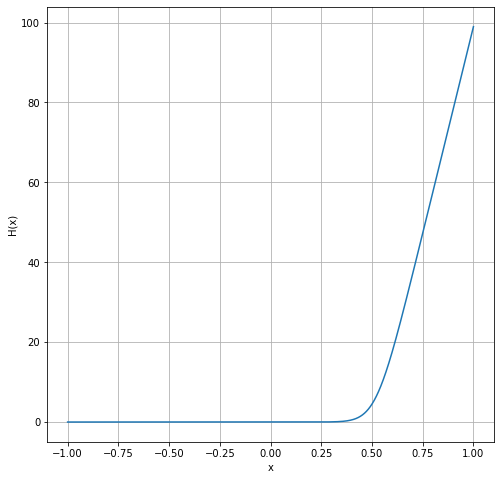

In [2]:
def H(x):
    a=207
    b=108
    d=0.154
    f=(a*x-b)/(1-np.exp(-d*(a*x-b)))
    return f

x=np.arange(-1,1,0.0001)
fig = plt.figure(figsize=(8,8))
plt.plot(x,H(x))
plt.grid()
plt.xlabel('x')
plt.ylabel('H(x)')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


### Neural Circuit
$$ x_{1}=J_{11}S_1-J_{12}S_2+I_{0}+I_{1}+I_{noise,1}$$
$$ x_{2}=J_{22}S_2-J_{21}S_1+I_{0}+I_{2}+I_{noise,1}$$

where the synaptic couplings are $J_{11}=0.2609$, $J_{22}=0.2609$, $J_{12}=0.0497$ and $J_{21}=0.0497$.
$I_{0}=0.3255 nA$ represents external input 


In [3]:
def total_synaptic_current(S_1,S_2,I_1,I_2,I_noise_1,I_noise_2):
    # Synaptic coupling
    J_11=0.2609 # nA
    J_22=0.2609 # nA
    J_12=0.0497 # nA
    J_21=0.0497 # nA
    I_0=0.3255  # nA
    x_1=J_11*S_1-J_12*S_2+I_0+I_1+I_noise_1
    x_2=J_22*S_2-J_21*S_1+I_0+I_2+I_noise_2
    return x_1, x_2


### Background activity
$$ \tau_{AMPA}\frac{d I_{noise,i}(t)}{dt} =-I_{noise,i}(t)+\eta_i(t)\sqrt{\tau_{AMPA}}\sigma_{noise}$$
$$ \tau_{AMPA}=2ms,$$
$$ \sigma_{noise}=0.02,$$
$$ \eta- white \ noise $$

In [4]:
def Background_Activity(I_noise,h):
    sigma_noise=0.02 # nA
    tau_AMPA=2#ms
    eta_noise=np.random.normal(0,1,1)
    I_0=0.0#3255  # nA
    I_noise_new=I_noise+(h)/tau_AMPA*(-(I_noise-I_0)+eta_noise*np.sqrt(tau_AMPA)*sigma_noise)
    return I_noise_new

### Network Dynamics
$$ \frac{d S_{i}}{dt} =\frac{-S_{i}}{\tau_S}+\big((1-S_i)\gamma H(x_i)\big)$$
$$\tau_S=100ms$$
$$\tau_S=0.1s$$
$$\gamma=0.641$$

Euler 
w_{i+1}

In [5]:
def S_diff(S,x,h):
    tau_S=100/1000#100 #ms
    𝛾=0.641
    S_new=S+h/1000*((-S/tau_S)+(1-S)*𝛾*H(x))
    return S_new

### Input Current Target

$$ I_i=J_{A,ext}\mu_0\left(1\pm \frac{c'}{100} \right) $$

$$\mu=30$$ Hz- spikes per second
$$ f=1$$  Only in Wong et al 2007
$$ J_{A,ext}=5.2 \times 10^{-4}$$
$$ c' $$ Coherence

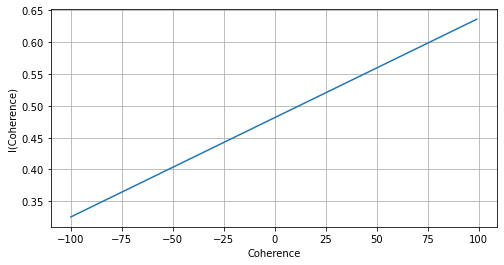

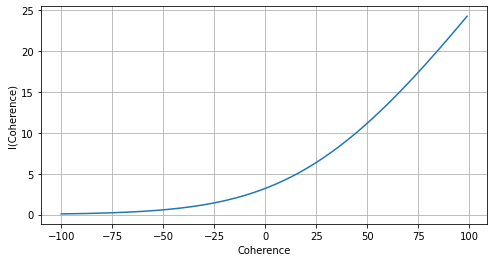

In [6]:
def I_input_1(c_dash):
    J_A_ext=5.2/1000# nA/Hz
    mu_0=30 # Hz
    f=1
    I_motion=J_A_ext*mu_0*(1+f*(c_dash)/100)
    return I_motion

All_coh=np.arange(-100,100,1)
fig = plt.figure(figsize=(8,4))
plt.plot(All_coh,I_input_1(All_coh)+0.3255)
plt.grid()
plt.xlabel('Coherence')
plt.ylabel('I(Coherence)')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
fig = plt.figure(figsize=(8,4))
plt.plot(All_coh,H(I_input_1(All_coh)+0.3255))
plt.grid()
plt.xlabel('Coherence')
plt.ylabel('I(Coherence)')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()



# Initial Conditions

In [7]:
h=0.1
time=np.arange(-1000,3000,h)
J_A_ext=5.2/1000 # nA/Hz
mu_0=30.0
I_noise_1=0.004*np.random.normal(0,1,len(time))
I_noise_2=0.004*np.random.normal(0,1,len(time))

x_1=J_A_ext*mu_0*np.ones(len(time))
x_2=J_A_ext*mu_0*np.ones(len(time))



S=0.5
S_1=S+np.random.uniform(0,0.001,len(time))
S_2=S+np.random.uniform(0,0.001,len(time))

I_1=np.zeros((len(time)))
I_2=np.zeros((len(time)))


In [8]:
COHERENCE_LEVEL=2

for i in range (0,len(time)-1):
    ## INPUT
    if time[i] >=0 and time[i]<200:
        c_dash=COHERENCE_LEVEL
    elif time[i] >=300 and time[i]<1500:
        c_dash=5
    else:
        c_dash=0.0
    
    
    I_noise_1[i+1]=Background_Activity(I_noise_1[i],h)
    I_noise_2[i+1]=Background_Activity(I_noise_2[i],h)
    
    I_1[i+1]=I_input_1(c_dash)
    I_2[i+1]=I_input_1(-c_dash)
   
    x_1[i+1],x_2[i+1]=total_synaptic_current(S_1[i],S_2[i],I_1[i],
                                      I_2[i],I_noise_1[i],I_noise_2[i])
    S_1[i+1]=S_diff(S_1[i],x_1[i],h)
    S_2[i+1]=S_diff(S_2[i],x_2[i],h)
   


### Plotting


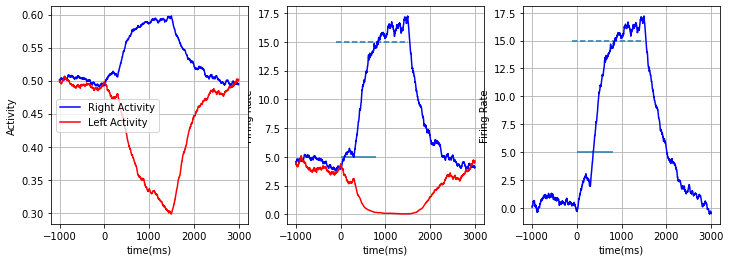

In [9]:
fig = plt.figure(figsize=(12,4))
plt.subplot(132)

plt.plot(time,H(S_1),'-',color='blue',label="Right")
plt.plot(time,H(S_2),'-',color='red',label="Left")
plt.hlines(15,-100,1500,linestyles='dashed')
plt.hlines(5,0,800)

plt.grid()
#plt.xlim((-100,1500))
plt.xlabel('time(ms)')
plt.ylabel('Firing Rate')

#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


plt.subplot(133)

plt.plot(time,H(S_1)-H(S_2),'-',color='blue',label="Right-Left")
plt.hlines(15,-100,1500,linestyles='dashed')
plt.hlines(5,0,800)

plt.grid()
#plt.xlim((-100,1500))
plt.xlabel('time(ms)')
plt.ylabel('Firing Rate')



plt.subplot(131)
plt.plot(time,S_1,'-',color='blue',label='Right Activity')
plt.plot(time,S_2,'-',color='red',label='Left Activity')

#plt.plot([0,1],[0,1],':k')
plt.grid()
plt.xlabel('time(ms)')
plt.ylabel('Activity')
#plt.xlim((-100,1500))

plt.legend()

plt.show()


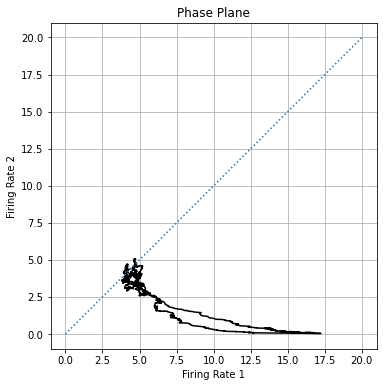

In [10]:
Firing_target_1=H(S_1)
Firing_target_2=H(S_2)

fig = plt.figure(figsize=(6,6))
plt.plot(Firing_target_1,Firing_target_2,'-',color='black')


plt.plot([0,20],[0,20],':')
plt.grid()
plt.xlabel('Firing Rate 1')
plt.ylabel('Firing Rate 2')
plt.title('Phase Plane')
plt.axis('square')
plt.show()



## References
Wong KF, Wang XJ. A recurrent network mechanism of time integration in perceptual decisions. J Neurosci. 2006 Jan 25;26(4):1314-28. doi: 10.1523/JNEUROSCI.3733-05.2006. PMID: 16436619; PMCID: PMC6674568.